In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [119]:
type_ = 'birth'
pop_df = pd.read_excel('D:/李門/20210311黃金海岸換來的人口時間序列分析論文/data/{0}_df.xlsx'.format(type_))

In [120]:
pop_df

,million,98,99,100,101,102,103,104,105,106,107,108
0,New Taipei City,32255,32093,27617,34323,22854,35915,38604,36313,34331,31611,NaN
1,Taipei City,20691,19403,18530,25132,22258,26710,29024,28987,27992,25042,NaN
2,Taoyuan City,19180,18515,15838,18041,16856,16757,17360,22384,23786,23356,NaN
3,Taichung City,23647,22601,19537,24027,20499,24555,26194,26313,25655,24338,NaN
4,Tainan City,14773,14196,11612,14208,17752,14788,15426,22469,14698,13773,NaN
5,Kaohsiung City,22182,11116,18684,21411,24963,21626,22520,12044,21757,20260,NaN
6,Taiwan,191310,166886,196627,229481,199113,210383,213598,208440,193844,181601,NaN


In [13]:
pop_df.iloc[0,0]

'New Taipei City'

In [129]:
df = pop_df

In [122]:
df.columns

Index(['million', 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108], dtype='object')

In [125]:

New_Taipei_City = df.iloc[0][1:11]
Taipei_City = df.iloc[1][1:11]
Taoyuan_City = df.iloc[2][1:11]
Taichung_City = df.iloc[3][1:11]
Tainan_City = df.iloc[4][1:11]
Kaohsiung_City = df.iloc[5][1:11]
Taiwan = df.iloc[6][1:11]

cities = [New_Taipei_City, Taipei_City, Taoyuan_City, Taichung_City, Tainan_City, Kaohsiung_City, Taiwan]

In [126]:
New_Taipei_City

98     32255
99     32093
100    27617
101    34323
102    22854
103    35915
104    38604
105    36313
106    34331
107    31611
Name: 0, dtype: object

Text(0.5, 1.0, 'Taiwan')

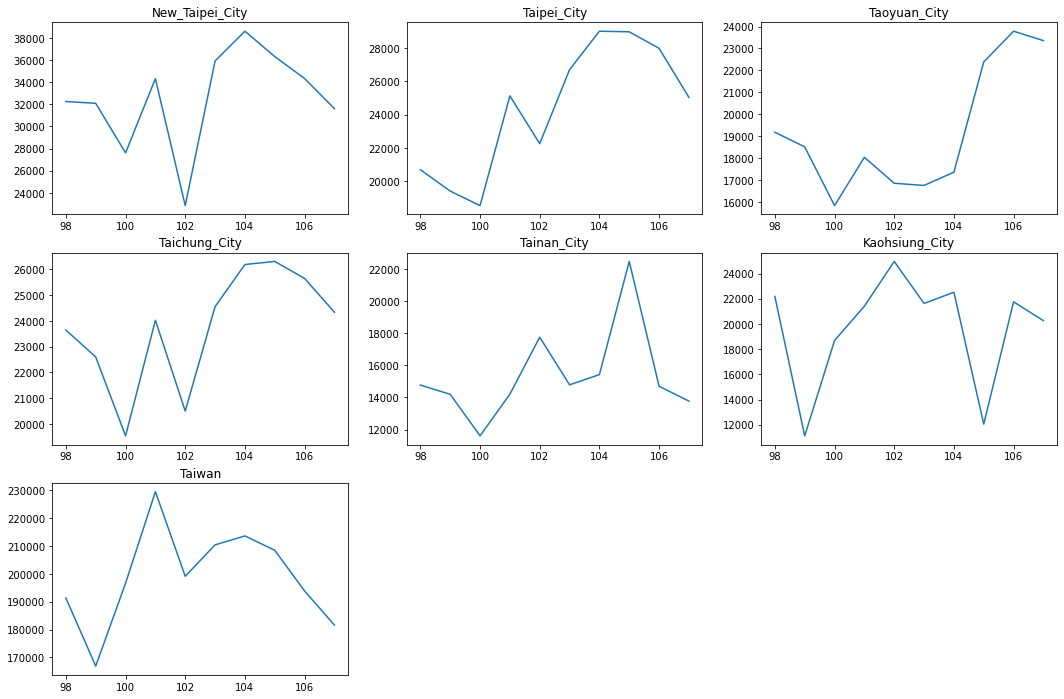

In [127]:
fig = plt.figure(figsize=(18, 12))                          #create a figure(2*1) with 2 empty subplot(ax1,ax2)
ax1=fig.add_subplot(3,3,1)                                 #figsize=(12inch, 6inch)
ax2=fig.add_subplot(3,3,2)   
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)

ax1.plot(New_Taipei_City)       
ax1.set_title('New_Taipei_City')
ax2.plot(Taipei_City)       
ax2.set_title('Taipei_City')
ax3.plot(Taoyuan_City)       
ax3.set_title('Taoyuan_City')
ax4.plot(Taichung_City)       
ax4.set_title('Taichung_City')
ax5.plot(Tainan_City)       
ax5.set_title('Tainan_City')
ax6.plot(Kaohsiung_City)       
ax6.set_title('Kaohsiung_City')
ax7.plot(Taiwan)       
ax7.set_title('Taiwan')

In [ ]:
fig = plt.figure(figsize=(18, 12))  
ax1=fig.add_subplot(3,3,1)                                 #figsize=(12inch, 6inch)
ax2=fig.add_subplot(3,3,2)   
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)

for i in range(cities):      
    axi.set_title(cities[i])
    pd.plotting.autocorrelation_plot(cities[i])


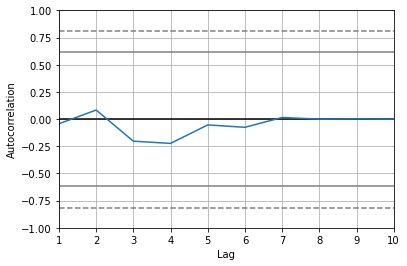

In [131]:

pd.plotting.autocorrelation_plot(New_Taipei_City)
#看出良好的 AR起始點 = 2 ? 因為沒有更接近0.5的 autocorrelation了

In [132]:
#特別處理台南的數據
df = pop_df
df = df.iloc[4][1:10]
df = np.asarray(df)
df

array([14773, 14196, 11612, 14208, 17752, 14788, 15426, 22469, 14698],
      dtype=object)

In [134]:
# Tainan_City 的 P 只能用5，其他縣市P=5反而會爆掉，為什麼?
arma_mod20 = ARIMA(df, order=(3, 0, 0)).fit()
print(arma_mod20.params)
print(arma_mod20.summary())
print(arma_mod20.predict)



[ 1.53664849e+04  1.57776034e-01 -5.02984806e-01  7.88281076e-01]
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                    9
Model:                     ARMA(3, 0)   Log Likelihood                 -82.265
Method:                       css-mle   S.D. of innovations           2372.905
Date:                Mon, 15 Mar 2021   AIC                            174.531
Time:                        18:08:07   BIC                            175.517
Sample:                             0   HQIC                           172.403
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.537e+04        nan        nan        nan         nan         nan
ar.L1.y        0.1578        nan        nan        nan         na

In [136]:
print(arma_mod20.predict())

[15366.48487563915 15155.847703088923 15096.187489429612
 14895.020354874652 16149.48149773205 13365.972902855727
 13162.124258410646 17547.300468982277 16001.147658715596]


In [138]:
print(Tainan_City)

98     14773
99     14196
100    11612
101    14208
102    17752
103    14788
104    15426
105    22469
106    14698
107    13773
Name: 4, dtype: object


In [145]:
arma_mod20.predict(0,0)-Tainan_City.iloc[0]

array([593.4848756391493], dtype=object)

In [105]:
pop_df.values

array([['New Taipei City', 32255, 32093, 27617, 34323, 22854, 35915,
        38604, 36313, 34331, 31611, nan],
       ['Taipei City', 20691, 19403, 18530, 25132, 22258, 26710, 29024,
        28987, 27992, 25042, nan],
       ['Taoyuan City', 19180, 18515, 15838, 18041, 16856, 16757, 17360,
        22384, 23786, 23356, nan],
       ['Taichung City', 23647, 22601, 19537, 24027, 20499, 24555, 26194,
        26313, 25655, 24338, nan],
       ['Tainan City', 14773, 14196, 11612, 14208, 17752, 14788, 15426,
        22469, 14698, 13773, nan],
       ['Kaohsiung City', 22182, 11116, 18684, 21411, 24963, 21626,
        22520, 12044, 21757, 20260, nan],
       ['Taiwan', 191310, 166886, 196627, 229481, 199113, 210383, 213598,
        208440, 193844, 181601, nan]], dtype=object)

In [110]:
df.shape

(9,)

In [104]:
#台南數據沒法Convergence，先把其他6個地區ARIMA
for i in range(0,4):
    df = np.asarray(cities[i])
    print(pop_df.iloc[i,0])
    arma_mod20 = ARIMA(df, order=(3, 1, 0)).fit()
    print(arma_mod20.params)
    print(arma_mod20.summary())
    print("*" *100)
    
#     pred = model_fit.predict
#     predictions.append(pred)
#     real = test[i]
#     train.append(real[0])   
#     low_bound.append(model_fit.forecast()[2][0][0])
#     up_bound.append(model_fit.forecast()[2][0][1])
    
#     print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real[0]))
    
MSE = mean_squared_error(test, predictions)
print('Mean Squared Error : '+str(round(MSE,4)))
    
for i in range(5,7):
    df = np.asarray(cities[i])
    print(pop_df.iloc[i,0])
    arma_mod20 = ARIMA(df, order=(3, 1, 0)).fit()
    print(arma_mod20.params)
    print(arma_mod20.summary())
    print("*" *100)

New Taipei City
[ 7.25603695e+02 -8.05934940e-01 -4.70878554e-01 -2.08658058e-01]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                    8
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -80.062
Method:                       css-mle   S.D. of innovations           5133.355
Date:                Mon, 15 Mar 2021   AIC                            170.123
Time:                        17:55:04   BIC                            170.521
Sample:                             1   HQIC                           167.444
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        725.6037    869.579      0.834      0.404    -978.741    2429.948
ar.L1.D.y     -0.8059      0.361     -2.233      

LinAlgError: SVD did not converge

In [91]:
arma_mod20.predict()

array([304.35694828764827, 5143.656163526259, 3987.984629295228,
       -23884.626640723385, -4788.952961349451, 14960.263928818033,
       -8337.458620383717, 1270.9883393723303, 6845.035790383896],
      dtype=object)

In [ ]:
arma_mod20 = ARIMA(df, order=(3, 1, 0)).fit()

In [ ]:
# 外援呃?

x1 = endog.reshape(-1)
model1 = ARIMA(x1, order = (1,1,2))
results = model1.fit(disp = -1)

plt.plot(results.fittedvalues, color = 'red')
model2.fit(endog, y)
y_pred = model3.predict(endog)

In [53]:
%matplotlib inline

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.api import qqplot

print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [69]:
dta = sm.datasets.sunspots.load_pandas().data
dta


,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [ ]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

dta.plot(figsize=(12,8));

In [61]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


In [59]:
type(dta)

pandas.core.frame.DataFrame

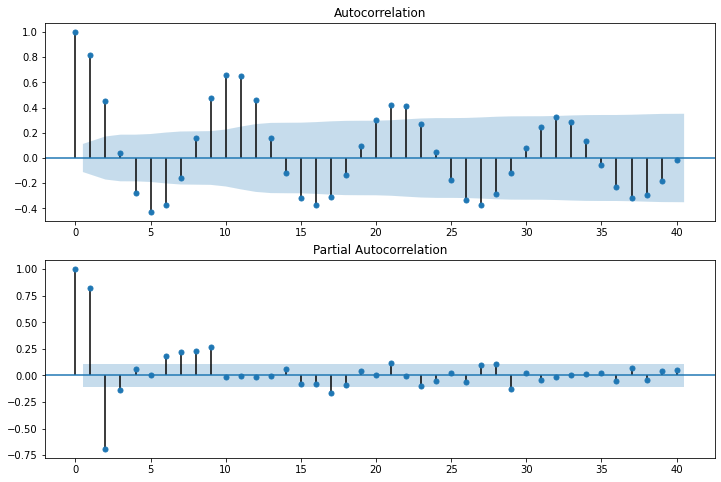

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [58]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727183
dtype: float64


C:\Users\User\.conda\envs\env_name\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\User\.conda\envs\env_name\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\User\.conda\envs\env_name\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [112]:
"""
台積電股價預測 with ARIMA
https://ycy-tw.github.io/2020/02/11/%E5%88%A9%E7%94%A8ARIMA%E9%80%B2%E8%A1%8C%E8%82%A1%E5%83%B9%E9%A0%90%E6%B8%AC(Forecasting%20Stock%20Price%20with%20ARIMA)/
"""
import numpy as np
import pandas as pd
from tabulate import tabulate
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

type = 'birth'
data = pd.read_excel('D:/李門/20210311黃金海岸換來的人口時間序列分析論文/data/{0}_df.xlsx'.format(type_))
df = data


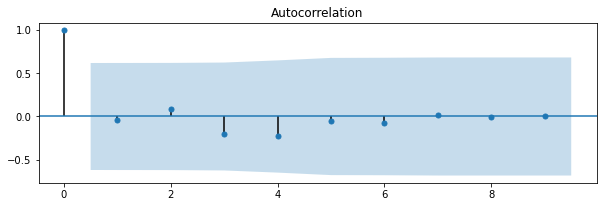

In [41]:
data = data.iloc[0,1:11]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
fig = plot_acf(data, ax=ax1, title="Autocorrelation")

In [44]:
# 我們也用ADF檢定來看看是否存在單根
result = adfuller(data)
print('p-value: {}'.format(round(result[1],4)))

p-value: 0.0648


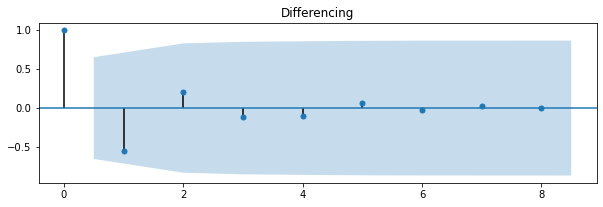

In [45]:
# 差分後的自我相關圖
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(312)
fig = plot_acf(data.diff().dropna(), ax=ax2, title="Differencing")


In [47]:
result = adfuller(data.diff().dropna())
print('p-value: %f' % result[1])

p-value: 0.000136


In [ ]:
Order = []
for p in range(1,6):
    for q in range(1,3):
        try:
            model = ARIMA(data, order=(p, 0, q))
            results = model.fit(disp=0)
            Order.append(round(pd.read_html(results.summary().as_html(), header=0, index_col=0)[0].iloc[2,2],2))
        except:
            Order.append('NA')
            print('No Result')

b = [Order[i:i+2] for i in range(0,len(Order),2)]
Order_df = pd.DataFrame(b,index=range(1,6),columns=range(1,3))
Order_df.index.name = "p \\ q "
print(tabulate(Order_df, headers='keys', tablefmt='fancy_grid',numalign="center"))

In [55]:
data = np.asarray(data)
model = ARIMA(data, order=(4, 0, 0))
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   10
Model:                     ARMA(4, 0)   Log Likelihood                 -97.274
Method:                       css-mle   S.D. of innovations           3949.798
Date:                Mon, 15 Mar 2021   AIC                            206.549
Time:                        17:29:34   BIC                            208.364
Sample:                             0   HQIC                           204.557
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.246e+04    940.522     34.514      0.000    3.06e+04    3.43e+04
ar.L1.y       -0.0833      0.279     -0.299      0.765      -0.630       0.463
ar.L2.y        0.0678      0.278      0.244      0.8

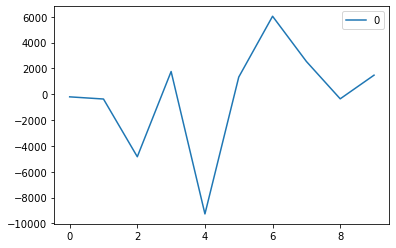

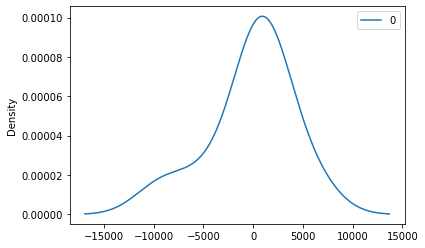

                 0
count    10.000000
mean   -193.515992
std    4204.818308
min   -9269.132417
25%    -370.970645
50%     559.689099
75%    1683.813434
max    6033.061728


In [56]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [67]:
 df.values

array([[ 32255,  32093,  27617,  34323,  22854,  35915,  38604,  36313,
         34331,  31611],
       [ 20691,  19403,  18530,  25132,  22258,  26710,  29024,  28987,
         27992,  25042],
       [ 19180,  18515,  15838,  18041,  16856,  16757,  17360,  22384,
         23786,  23356],
       [ 23647,  22601,  19537,  24027,  20499,  24555,  26194,  26313,
         25655,  24338],
       [ 14773,  14196,  11612,  14208,  17752,  14788,  15426,  22469,
         14698,  13773],
       [ 22182,  11116,  18684,  21411,  24963,  21626,  22520,  12044,
         21757,  20260],
       [191310, 166886, 196627, 229481, 199113, 210383, 213598, 208440,
        193844, 181601]], dtype=int64)

In [116]:
price = df.iloc[0,1:11].values
length = 4
train = list(price[0:length])
test =  price[length:len(price)]
date = data.index[length:len(price)]
predictions = []
low_bound = []
up_bound = []


for i in range(len(test)):
    model = ARIMA(train, order=(3, 0, 0))
    model_fit = model.fit#(disp=0)
    pred = model_fit.predict
    predictions.append(pred)
    real = test[i]
    train.append(real[0])   
    low_bound.append(model_fit.forecast()[2][0][0])
    up_bound.append(model_fit.forecast()[2][0][1])
    
    print(date[i] ,"|", 'Pred - '+str(round(pred[0],2)) ,"|", 'Real - '+str(real[0]))
    
MSE = mean_squared_error(test, predictions)
print('Mean Squared Error : '+str(round(MSE,4)))

New Taipei City
[ 7.25603695e+02 -8.05934940e-01 -4.70878554e-01 -2.08658058e-01]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                    8
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -80.062
Method:                       css-mle   S.D. of innovations           5133.355
Date:                Mon, 15 Mar 2021   AIC                            170.123
Time:                        18:02:48   BIC                            170.521
Sample:                             1   HQIC                           167.444
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        725.6037    869.579      0.834      0.404    -978.741    2429.948
ar.L1.D.y     -0.8059      0.361     -2.233      

AttributeError: 'function' object has no attribute 'predict'

In [117]:
MSE = mean_squared_error(test, predictions)
print('Mean Squared Error : '+str(round(MSE,4)))

ValueError: Found input variables with inconsistent numbers of samples: [6, 0]

In [115]:
print(arma_mod20.predict())

[477.85848959938403 1368.9257562971325 3650.66746291388
 -1748.3137239013486 2168.4599587132357 -859.6426622547274
 -1581.0966251034765 754.094132499718]


In [80]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.
